In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
x = [i for i in range(20)]
y = [5/(i+1) for i in range(200)]
z = [i%2 for i in range(200)]
df = pd.DataFrame(list(zip(x, y, z)), columns=["Batch", "Loss", "Type"])

In [3]:
print(list(zip(x, y, z)))

[(0, 5.0, 0), (1, 2.5, 1), (2, 1.6666666666666667, 0), (3, 1.25, 1), (4, 1.0, 0), (5, 0.8333333333333334, 1), (6, 0.7142857142857143, 0), (7, 0.625, 1), (8, 0.5555555555555556, 0), (9, 0.5, 1), (10, 0.45454545454545453, 0), (11, 0.4166666666666667, 1), (12, 0.38461538461538464, 0), (13, 0.35714285714285715, 1), (14, 0.3333333333333333, 0), (15, 0.3125, 1), (16, 0.29411764705882354, 0), (17, 0.2777777777777778, 1), (18, 0.2631578947368421, 0), (19, 0.25, 1)]


<AxesSubplot:xlabel='Batch', ylabel='Loss'>

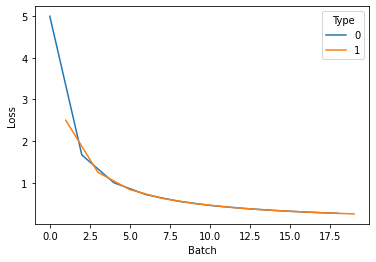

In [4]:
sns.lineplot(x="Batch", y="Loss", hue="Type", data=df)

In [5]:
import torch
import torchmetrics
from time import time

a = torch.randint(0,80,(100,256,256)).cuda()
b = torch.randint(0,80,(100,256,256)).cuda()

start = time()
print("manual accuracy:", (a == b).sum()/torch.numel(a))
end = time() - start
print(f"Done in {end}s")

start = time()
print("torchmetrics accuracy:" ,torchmetrics.functional.accuracy(torch.flatten(b), torch.flatten(a)))
end = time() - start
print(f"Done in {end}s")


/home/dkermany/.local/share/virtualenvs/BoneSegmentation-C6QGg7XR/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


manual accuracy: tensor(0.0125, device='cuda:0')
Done in 0.0023720264434814453s
torchmetrics accuracy: tensor(0.0125, device='cuda:0')
Done in 0.1241753101348877s


In [6]:
one_hot_a = torch.nn.functional.one_hot(
    a.long(),
    num_classes=81,
).permute(0,3,1,2)
one_hot_b = torch.nn.functional.one_hot(
    b.long(),
    num_classes=81,
).permute(0,3,1,2)

start = time()
print("manual IOU:" ,torch.logical_and(a,b).sum()/torch.logical_or(a,b).sum())
end = time() - start
print(f"Done in {end}s")

start = time()
print("torchmetric IOU:" ,torchmetrics.functional.jaccard_index(
    a,
    b,
    num_classes=81,
    ignore_index=0,
    average="micro",
))
end = time() - start
print(f"Done in {end}s")

manual IOU: tensor(0.9753, device='cuda:0')
Done in 0.013720035552978516s
torchmetric IOU: tensor(0.0063, device='cuda:0')
Done in 0.12473893165588379s


In [9]:
def iou(pred, y_true):
    return (torch.logical_and(pred, y_true) + .1).sum() / (torch.logical_or(pred, y_true) + .1).sum()

In [11]:
miou = 0.
for n in range(81):
    miou += iou(torch.flatten(one_hot_a[:,n,:,:]), torch.flatten(one_hot_b[:,n,:,:]))
miou /= 81
print(miou)

tensor(0.8047, device='cuda:0')


In [15]:
a = [
    (1,2,3),
    (1,2,3),
    (1,2,3),
    (1,2,3),
    (1,2,3),
]
df = pd.DataFrame(a, columns=["batch", "loss", "mode"])
df.to_csv("test.csv")